In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
data = pdr.get_data_yahoo('^GSPC', datetime(1970, 1, 1))
import matplotlib.pyplot as plt
%matplotlib inline

[*********************100%***********************]  1 of 1 completed


In [3]:
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

### Load Data

In [4]:
symbols = ["XOM","CL=F"]
# symbols = ["XOM","CL=F","GC=F"]
start_date = datetime(2020,1,1)
end_date = datetime.today()
price_data = pdr.get_data_yahoo(symbols, start_date, end_date)
price_data = price_data["Adj Close"]
price_data.head()

[*********************100%***********************]  2 of 2 completed


,CL=F,XOM
Date,,
2020-01-02,61.180000,59.038685
2020-01-03,63.049999,58.564053
2020-01-06,63.270000,59.013699
2020-01-07,62.700001,58.530743
2020-01-08,59.610001,57.648079


### Explore Data
Checking for outliers, possible relationship etc.

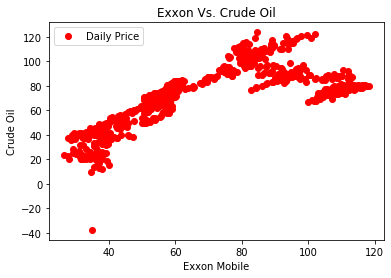

In [6]:
# define the x & y data.
x = price_data['XOM']
# x = price_data['GC=F']
y = price_data['CL=F']

# create the scatter plot.
plt.plot(x, y, 'o', color ='red', label = 'Daily Price')

plt.title("Exxon Vs. Crude Oil")
plt.xlabel("Exxon Mobile")
plt.ylabel("Crude Oil")
plt.legend()

plt.show()

Remove the outlier with negative value of Crude Oil

In [7]:
# measure the correlation
price_data.corr()

,CL=F,XOM
CL=F,1.000000,0.762901
XOM,0.762901,1.000000


Both prices seem to be strongly correlated 

In [8]:
# Staticstical summary

price_data.describe()

,CL=F,XOM
count,825.000000,822.000000
mean,67.993418,64.522813
std,24.060772,26.087578
min,-37.630001,26.564505
25%,47.619999,40.595674
50%,70.559998,57.079824
75%,83.760002,85.942015
max,123.699997,118.260002


/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


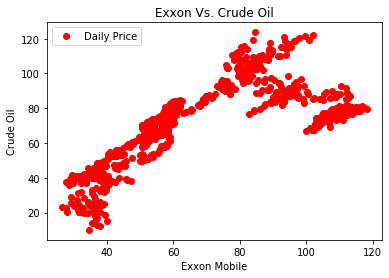

,CL=F,XOM
count,821.000000,821.000000
mean,68.045128,64.559037
std,23.784251,26.082786
min,10.010000,26.564505
25%,47.619999,40.615051
50%,70.559998,57.090164
75%,83.760002,85.951355
max,123.699997,118.260002


In [11]:
# There seems to be an outlier (-37.63), let's remove it.

# Take only positive prices
price_data = price_data[price_data["CL=F"]>0]
price_data = price_data.dropna()

x = price_data['XOM']
y = price_data['CL=F']
plt.plot(x, y, 'o', color ='red', label = 'Daily Price')
plt.title("Exxon Vs. Crude Oil")
plt.xlabel("Exxon Mobile")
plt.ylabel("Crude Oil")
plt.legend()
plt.show()

price_data.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf72c18b90>,
      dtype=object)

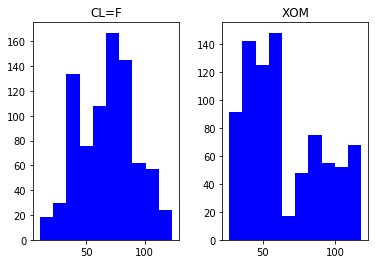

In [12]:
price_data.hist(grid = False, color = 'blue')

## Skewness and Outliers check

In [13]:
# kurtosis using fisher method
exxon_kurtosis = kurtosis(price_data['XOM'], fisher = True)
oil_kurtosis = kurtosis(price_data['CL=F'], fisher = True)

# calculate the skewness
exxon_skew = skew(price_data['XOM'])
oil_skew = skew(price_data['CL=F'])

display("Exxon Excess Kurtosis: {:.2}".format(exxon_kurtosis))  # this looks fine
display("Oil Excess Kurtosis: {:.2}".format(oil_kurtosis))      # this looks fine

display("Exxon Skew: {:.2}".format(exxon_skew))          # moderately skewed
display("Oil Skew: {:.2}".format(oil_skew))              # moderately skewed, it's a little high but we will accept it.

'Exxon Excess Kurtosis: -1.0'

'Oil Excess Kurtosis: -0.6'

'Exxon Skew: 0.5'

'Oil Skew: -0.032'

In [14]:
# perform a kurtosis test
display('Exxon')
display(stats.kurtosistest(price_data['XOM']))
display('Oil')
display(stats.kurtosistest(price_data['CL=F']))

# perform a skew test
display('Exxon')
display(stats.skewtest(price_data['XOM']))
display('Oil')
display(stats.skewtest(price_data['CL=F']))

'Exxon'

KurtosistestResult(statistic=-14.32176528815724, pvalue=1.6000657007659038e-46)

'Oil'

KurtosistestResult(statistic=-5.016162289228364, pvalue=5.271380661807107e-07)

'Exxon'

SkewtestResult(statistic=5.570882499987828, pvalue=2.5345222347736652e-08)

'Oil'

SkewtestResult(statistic=-0.3717449829358846, pvalue=0.7100827297747961)

## Build the model

### Split the data

In [15]:
# define our input variable (X) & output variable.
Y = price_data[['XOM']]
# Y = price_data.drop('CL=F', axis = 1) #drop crude oil column
X = price_data[['CL=F']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [16]:
# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# grab the coefficient of our model and the intercept.
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.84
The intercept for our model is 7.018


In [18]:
#test a prediction
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 63.6


### Evaluation of model

In [19]:
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[84.59875748],
       [42.5180885 ],
       [47.66156105],
       [51.96459676],
       [57.90648494]])

In [20]:
# define our input
X2 = sm.add_constant(X)

# create a OLS model.
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
# make some confidence intervals, 95% by default.
est.conf_int()

,0,1
const,3.883353,10.847697
CL=F,0.792212,0.888835


In [22]:
np.any(np.isnan(price_data))

False

### Hypothesis testing

Null hypothesis: There is no relation between prices of Exxon Mobil and Crude oil (Coeff = 0)
    
Alternate hypothesis: There is relation between the two prices

In [23]:
# estimate the p-values.
est.pvalues

const     3.643262e-05
CL=F     1.253848e-159
dtype: float64

p value is < 0.05 hence we can reject the null hypothesis

## Model Fit

In [24]:
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

MSE 2.78e+02
MAE 12.9
RMSE 16.7
R2: 0.6


In [25]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    XOM   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     1166.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          1.25e-159
Time:                        11:41:50   Log-Likelihood:                -3478.5
No. Observations:                 821   AIC:                             6961.
Df Residuals:                     819   BIC:                             6970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3655      1.774      4.152      0.0

#### Residuals

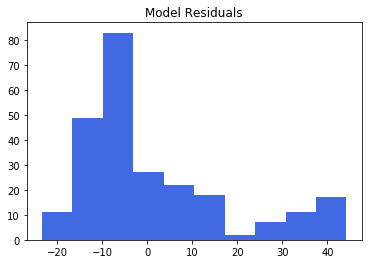

In [26]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

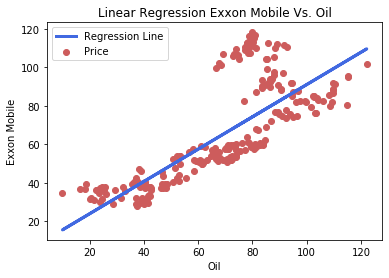

Oil coefficient:0.84
Mean squared error: 278.4
Root Mean squared error: 16.69
R2 score: 0.6


In [27]:
# Plot outputs
plt.scatter(X_test, y_test,  color='indianred', label = 'Price')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()

# The coefficients
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Save Model

In [28]:
import pickle

# pickle the model.
with open('my_linear_regression.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in.
with open('my_linear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

# make a new prediction.
regression_model_2.predict([[60]])

array([[57.44424532]])